In [1]:
import gravipy
import glob
from astropy.io import fits
import numpy as np

# Initial guesses

In [2]:
orb = gravipy.GCorbits()
# orb = gravipy.GCorbits(verbose=False)

Stars with orbits:
['S1', 'S2', 'S4', 'S8', 'S9', 'S12', 'S13', 'S14', 'S17', 'S18', 'S19', 'S21', 'S23', 'S24', 'S29', 'S31', 'S33', 'S38', 'S42', 'S55', 'S60', 'S66', 'S67', 'S71', 'S83', 'S85', 'S87', 'S89', 'S91', 'S96', 'S97', 'S145', 'S175', 'R34', 'R44']

Stars with proper motions:
['S7', 'S10', 'S11', 'S20', 'S22', 'S25', 'S26', 'S27', 'S30', 'S32', 'S34', 'S35', 'S36', 'S37', 'S41', 'S43', 'S45', 'S46', 'S47', 'S50', 'S51', 'S52', 'S53', 'S56', 'S57', 'S59', 'S62', 'S63', 'S65', 'S68', 'S95', 'S300', 'S5', 'S6', 'S28', 'S39', 'S44', 'S48', 'S58', 'S64', 'S82']


In [3]:
orb.star_orbits['S2']

{'name': 'S2',
 'a': 124.95443497800004,
 'e': 0.884451414977,
 'P': 16.05472588091165,
 'T': 2018.37914035,
 'i': 2.350950151140611,
 'CapitalOmega': 3.9826052243324184,
 'Omega': 1.1569650367155615,
 'Kmag': 14.136727272727276,
 'Hmag': 15.63086206896552,
 'type': 'e',
 'mag': 14.136727272727276}

In [4]:
orb.star_pms['S62']

{'name': 'S62',
 'x': 33.847510592097876,
 'y': 41.14774114657065,
 'vx': -3.142370168752553,
 'vy': -3.808237727018113,
 'ax': 0.0,
 'ay': 0.0,
 'T': 2014.385205,
 'vr': 0,
 'Kmag': 18.85100555555556,
 'Hmag': 19.326874999999998,
 'type': '',
 'mag': 17.751005555555558,
 'circ': True}

In [5]:
tstr = '2022-09-14T01:00:00'
t = gravipy.convert_date(tstr)
t

(2022.701003878622, datetime.datetime(2022, 9, 14, 1, 0))

In [6]:
tstr = '2022-09-14T01:00:00'
t = gravipy.convert_date(tstr)[0]
t

2022.701003878622

In [7]:
orb.pos_orbit('S2', t)

array([0.01121982, 0.16407396])

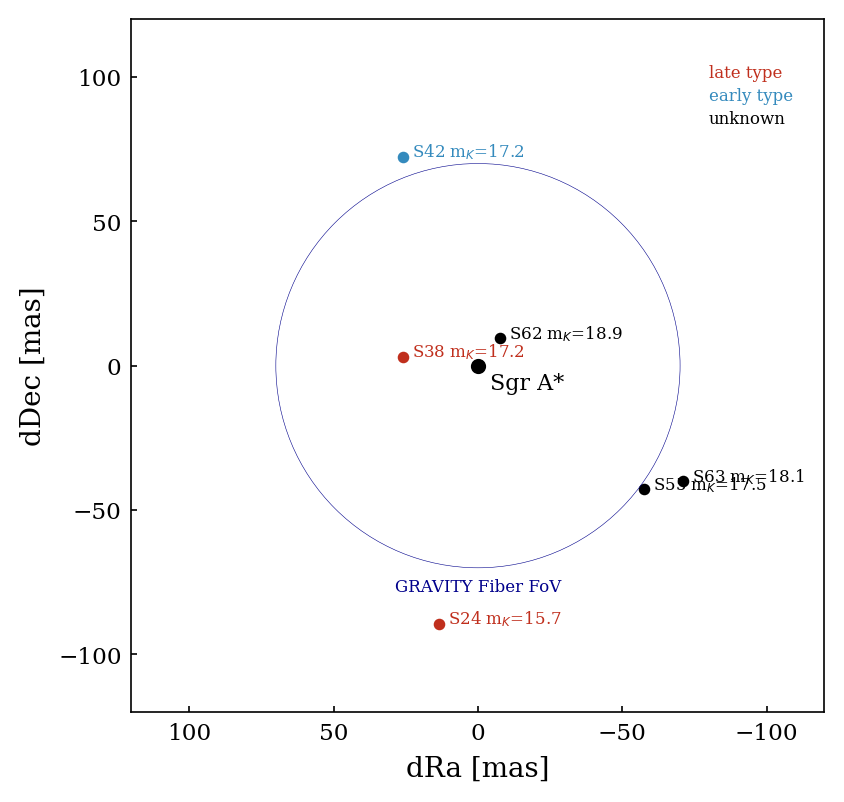

In [8]:
orb.plotOrbits(tstr, long=True)

In [9]:
import gravipy
orb = gravipy.GCorbits(verbose=False)
tstr = '2022-09-14T01:00:00'
t = gravipy.convert_date(tstr)[0]

s38 = orb.pos_orbit('S38', t)*1e3
s62 = orb.pos_pm('S62', t)*1e3
s62s38 = 10**(-0.4*(orb.star_pms['S62']['Kmag'] - orb.star_orbits['S38']['Kmag']))

# Full night corrections

In [10]:
night = '2022-09-14'
n = gravipy.GravPhaseNight(night)

using default calibrator
Night:      2022-09-14 
Calibrator: GRAVI.2022-09-14T23:50:37.719_dualscivis.fits
Data from:  /data/user/forFrank2/2022-09-14/reduced_PL20220728
            11 SGRA files 
            4 S2 files
NDIT:       1





No correction for metrology systematics used
Applied poscor: (-0.253,0.815) mas 
Chi2 of poscor: 1571.70 



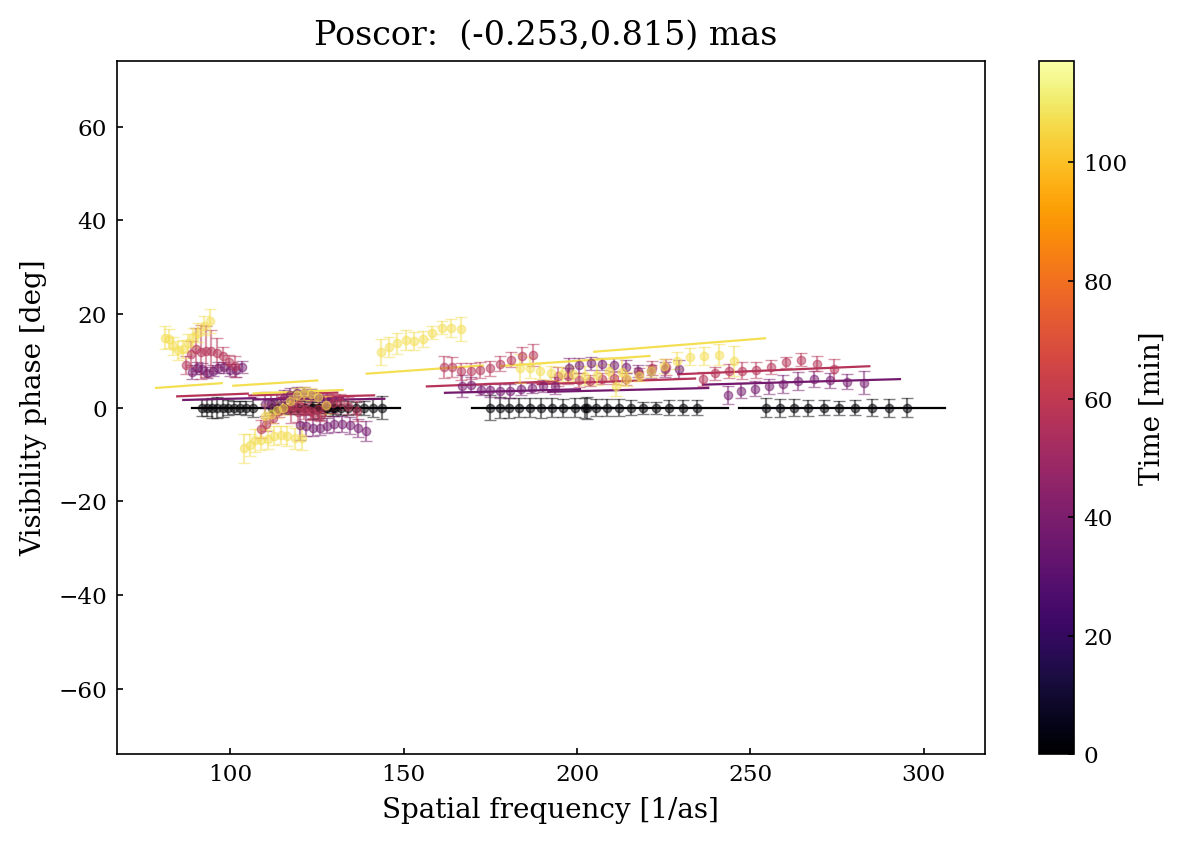

/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/phasecor.py:1828: RuntimeWarning: invalid value encountered in remainder
  sg_visphi_p1 = ((sg_visphi_p1+180)%360)-180
/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/phasecor.py:1829: RuntimeWarning: invalid value encountered in remainder
  sg_visphi_p2 = ((sg_visphi_p2+180)%360)-180


In [11]:
n.process_night(None, poscor=True, plot=True)

# Fitting
## Look at data

In [12]:
data = sorted(glob.glob('data/*.fits'))

In [23]:
data

['data/GRAVI.2022-09-14T23:50:37.719_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-14T23:56:55.735_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:14:43.780_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:21:31.797_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:28:25.814_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:34:46.830_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:41:04.846_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:47:37.863_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T00:53:58.879_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T01:02:40.901_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T01:09:22.918_dualscivis_science_dualsciviscalibrated.fits',
 'data/GRAVI.2022-09-15T01:15:52.934_dualscivis_science_dualsciviscalibrated

In [13]:
_ = [print(fits.open(i)[0].header['ESO INS SOBJ OFFX'],
           fits.open(i)[0].header['ESO INS SOBJ OFFY'])
     for i in data]

10.509 164.113
0.0 0.0
0.0 0.0
0.0 0.0
10.509 164.113
9.71 76.951
9.71 76.951
10.509 164.113
10.0 -97.693
10.0 -97.693
10.0 -97.693
0.0 0.0
0.0 0.0
10.509 164.113
0.0 0.0


In [14]:
sgfiles = []
s2files = []
northfiles = []
southfiles = []
for d in data:
    h = fits.open(d)[0].header
    if h['ESO INS SOBJ OFFX'] == 0:
        sg_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
        sgfiles.append(d)
    elif h['ESO INS SOBJ OFFX'] == 10.509:
        s2files.append(d)
        s2_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
    elif h['ESO INS SOBJ OFFX'] == 9.71:
        n_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
        print('North')
        northfiles.append(d)
    elif h['ESO INS SOBJ OFFX'] == 10.:
        s_off = [h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']]
        print('South')
        southfiles.append(d)
    else:
        print([h['ESO INS SOBJ OFFX'],h['ESO INS SOBJ OFFY']])


North
North
South
South
South


Category: DUAL_SCI_VIS_CALIBRATED
Telescope: UT
Polarization: SPLIT
Resolution: LOW
DIT: 10.000000
NDIT: 32


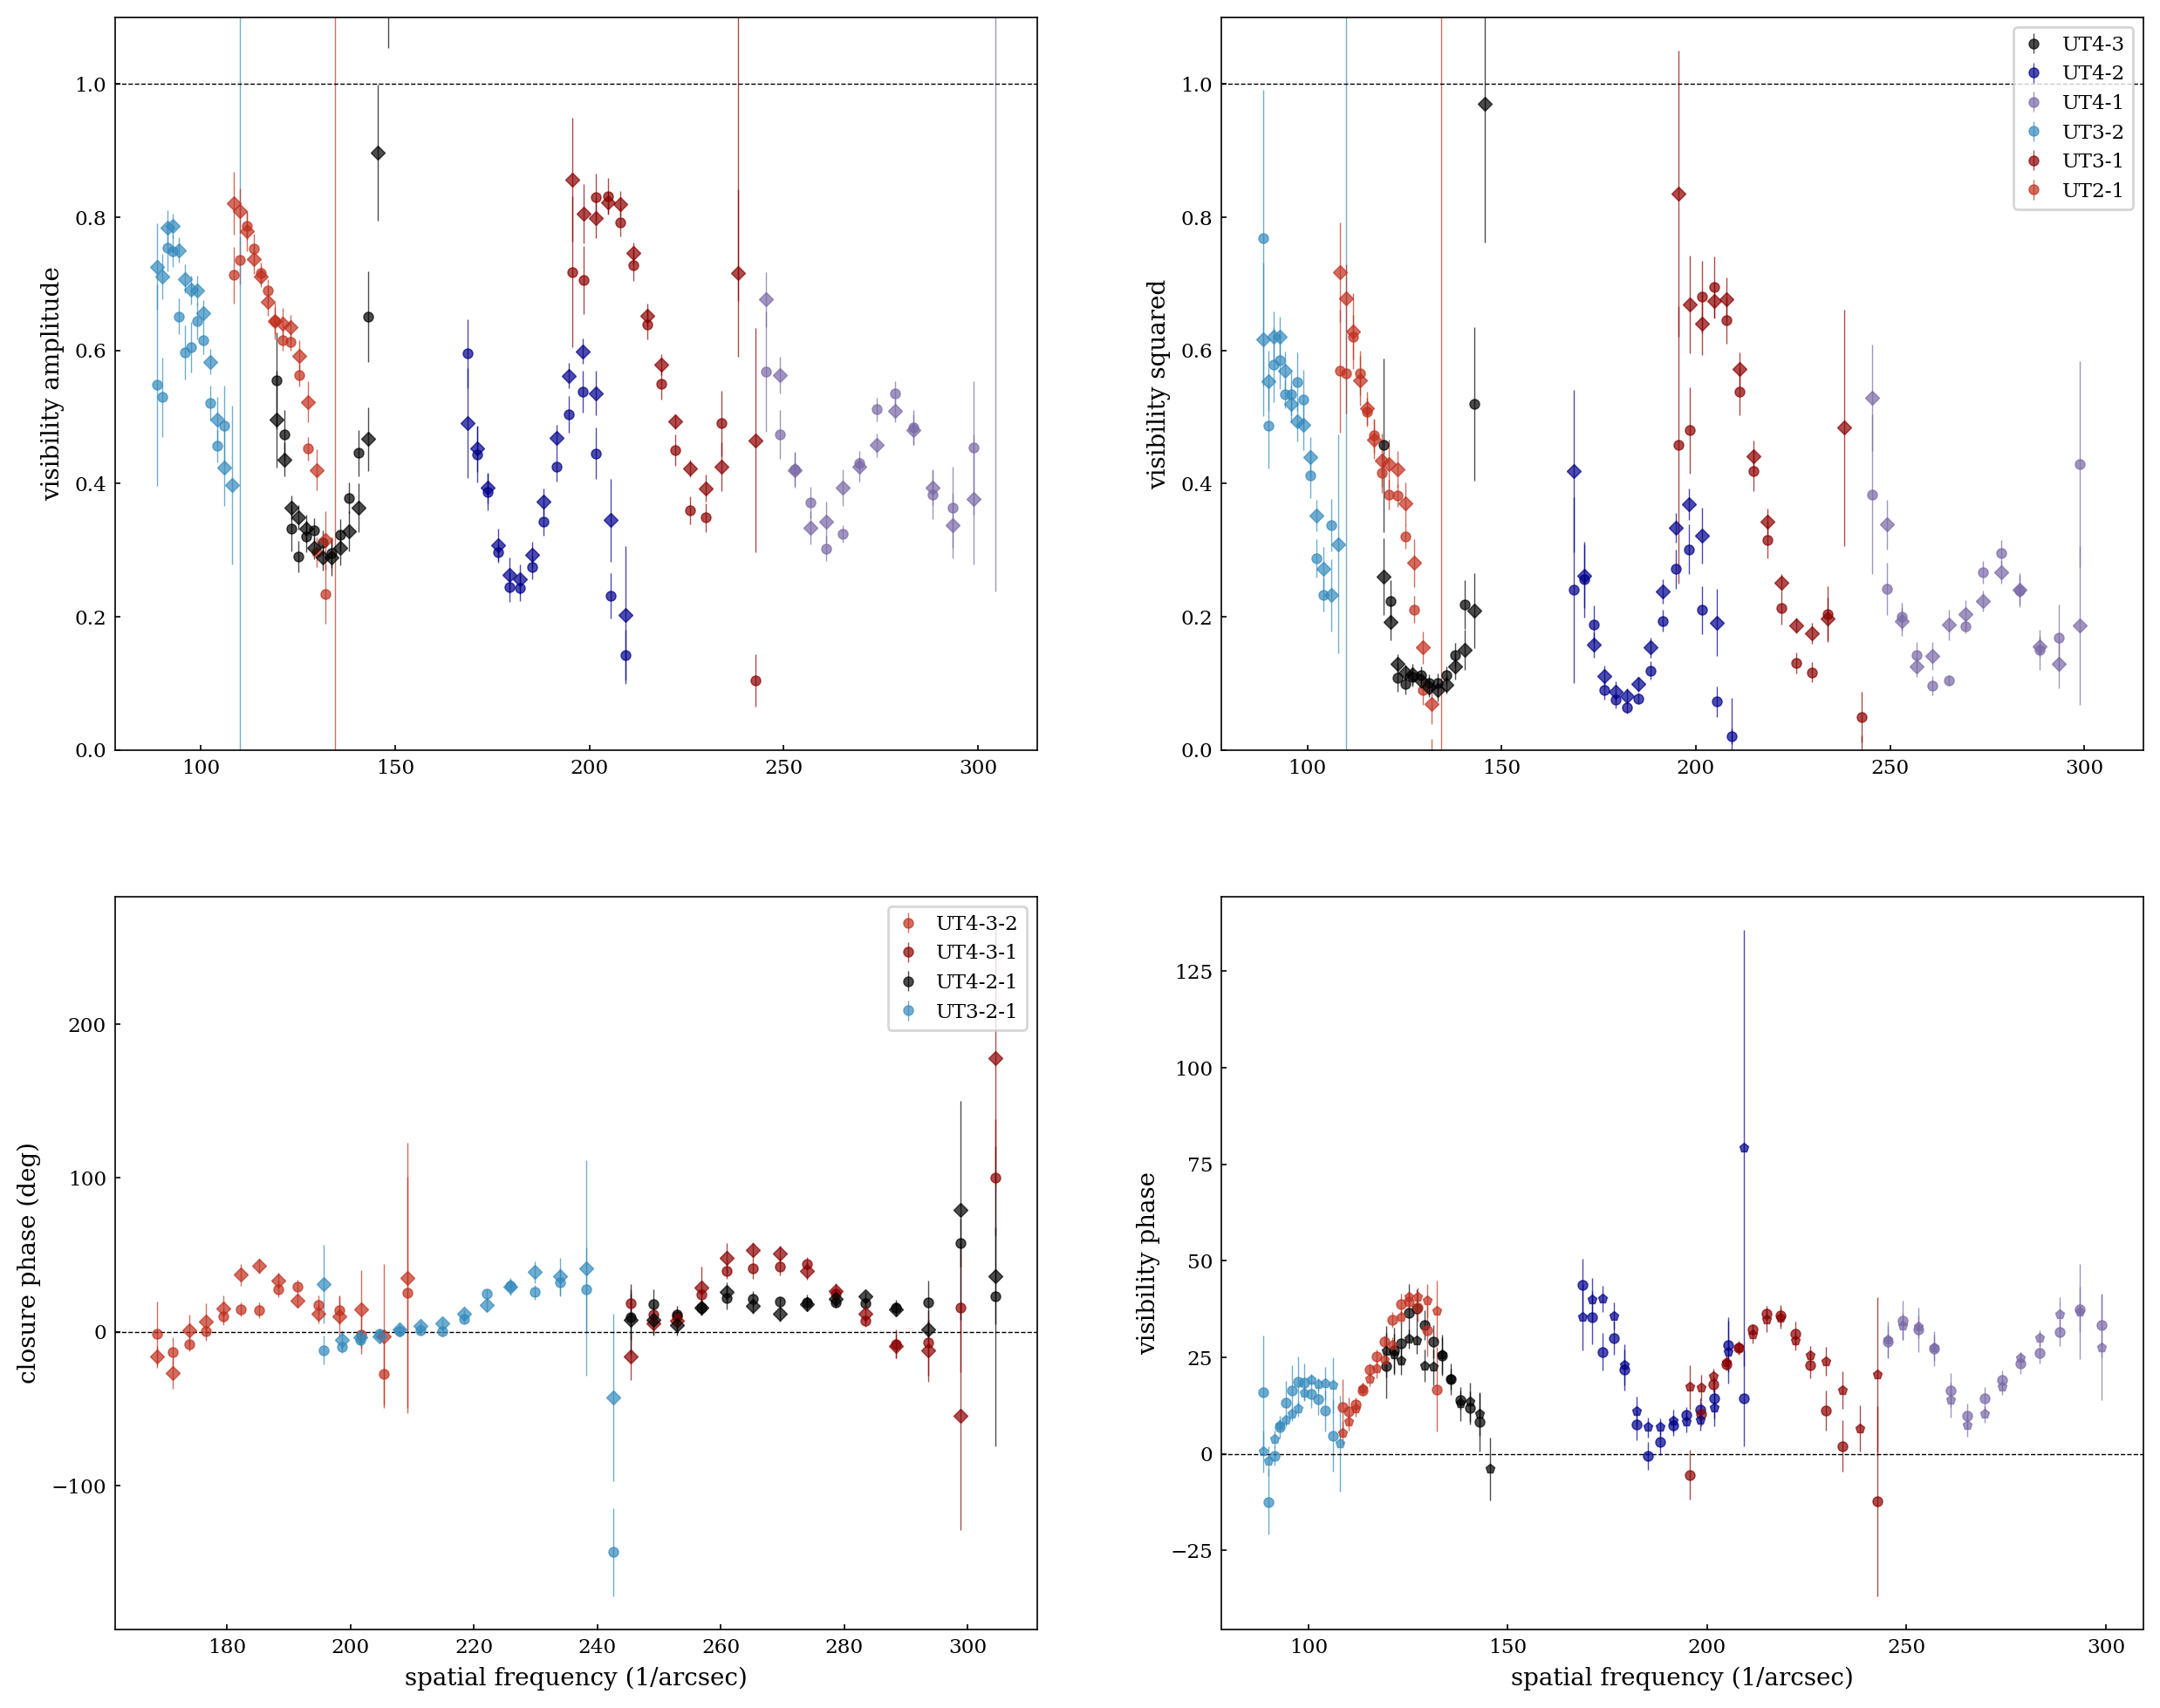

In [15]:
file = sgfiles[0]
d = gravipy.GravData(file)
d.getIntdata(plot=True)

NDIT = 1
Run MCMC for DIT 1
using channels from #3 to #13
Run MCMC for Pol 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:47<00:00,  6.39it/s]


---------------------------------------
Mean acceptance fraction: 0.42
---------------------------------------


ndof: 54
red. chi2 for visamp: 8.69
red. chi2 for vis2: 8.03
red. chi2 for visphi: 67.85
red. chi2 for closure: 5.15


-----------------------------------
Best chi2 result:
dRA1 = 24.714
dDEC1 = 4.906
fr2 = -2.918
alpha BH = 2.174
f BG = 0.823
fr BH = 0.122


MCMC Result:
dRA1 = 24.728 + 0.062 - 0.029
dDEC1 = 4.881 + 0.051 - 0.100
fr2 = -2.382 + 0.568 - 0.409
alpha BH = 1.802 + 0.564 - 2.089
f BG = 0.824 + 0.029 - 0.034
fr BH = 0.119 + 0.013 - 0.030
-----------------------------------
Run MCMC for Pol 2


/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1725: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:45<00:00,  6.61it/s]
/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1725: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)


---------------------------------------
Mean acceptance fraction: 0.31
---------------------------------------


ndof: 54
red. chi2 for visamp: 11.16
red. chi2 for vis2: 13.29
red. chi2 for visphi: 81.62
red. chi2 for closure: 9.14


-----------------------------------
Best chi2 result:
dRA1 = 24.660
dDEC1 = 4.769
fr2 = -2.948
alpha BH = 2.154
f BG = 0.767
fr BH = 0.137


MCMC Result:
dRA1 = 24.720 + 0.269 - 0.056
dDEC1 = 4.693 + 0.081 - 0.552
fr2 = -2.559 + 0.612 - 0.276
alpha BH = 0.525 + 1.521 - 4.462
f BG = 0.772 + 0.033 - 0.416
fr BH = 0.119 + 0.024 - 0.907
-----------------------------------


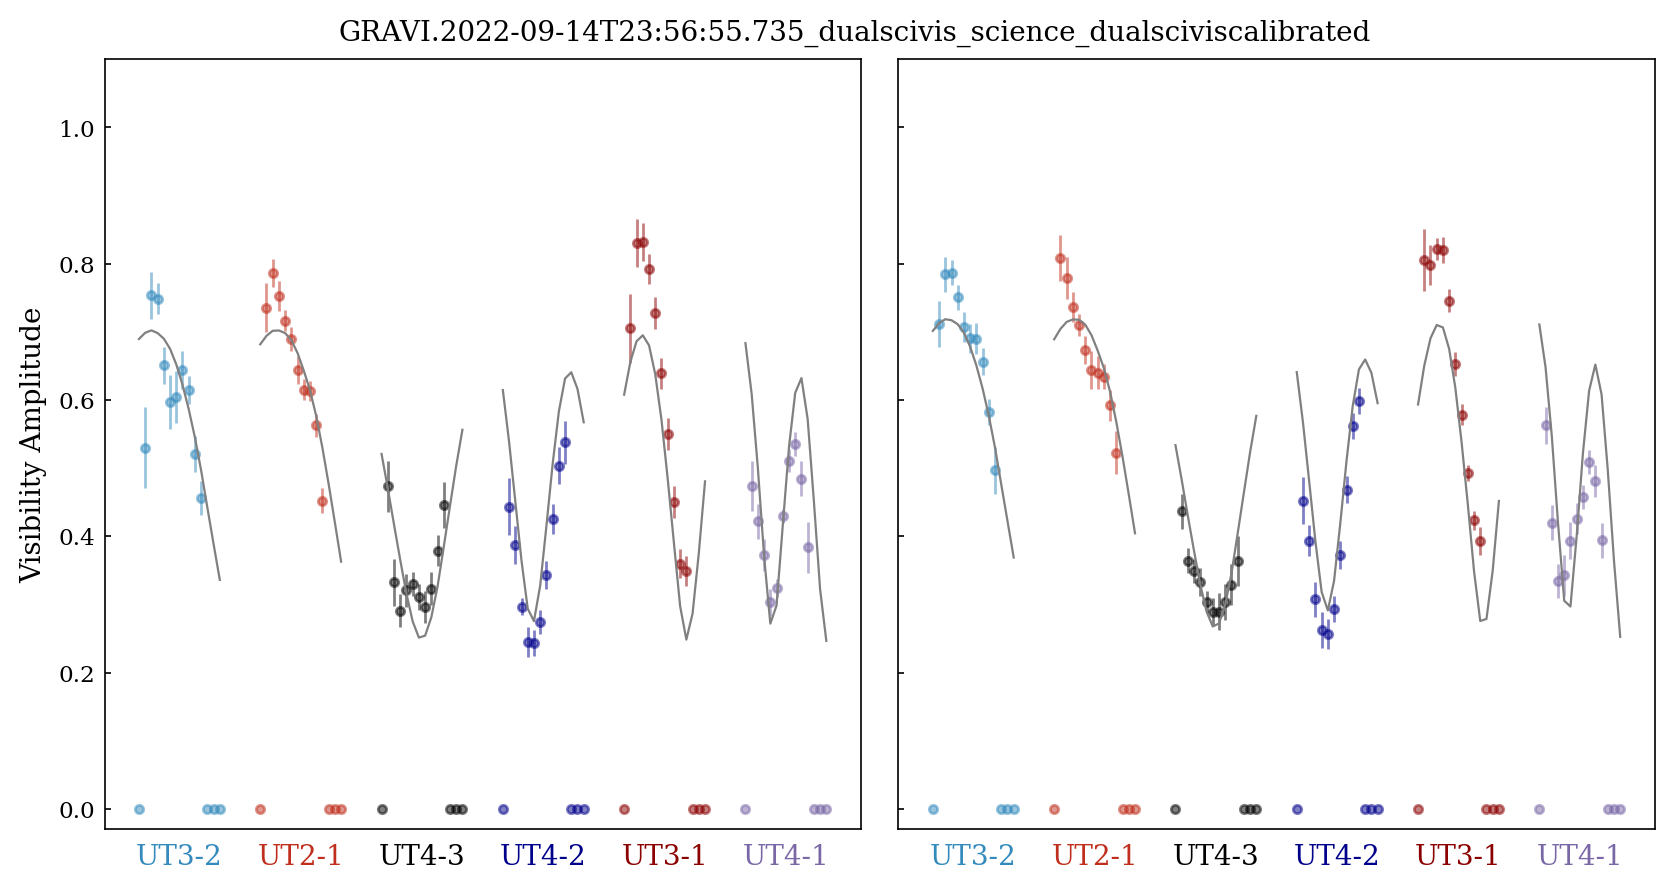

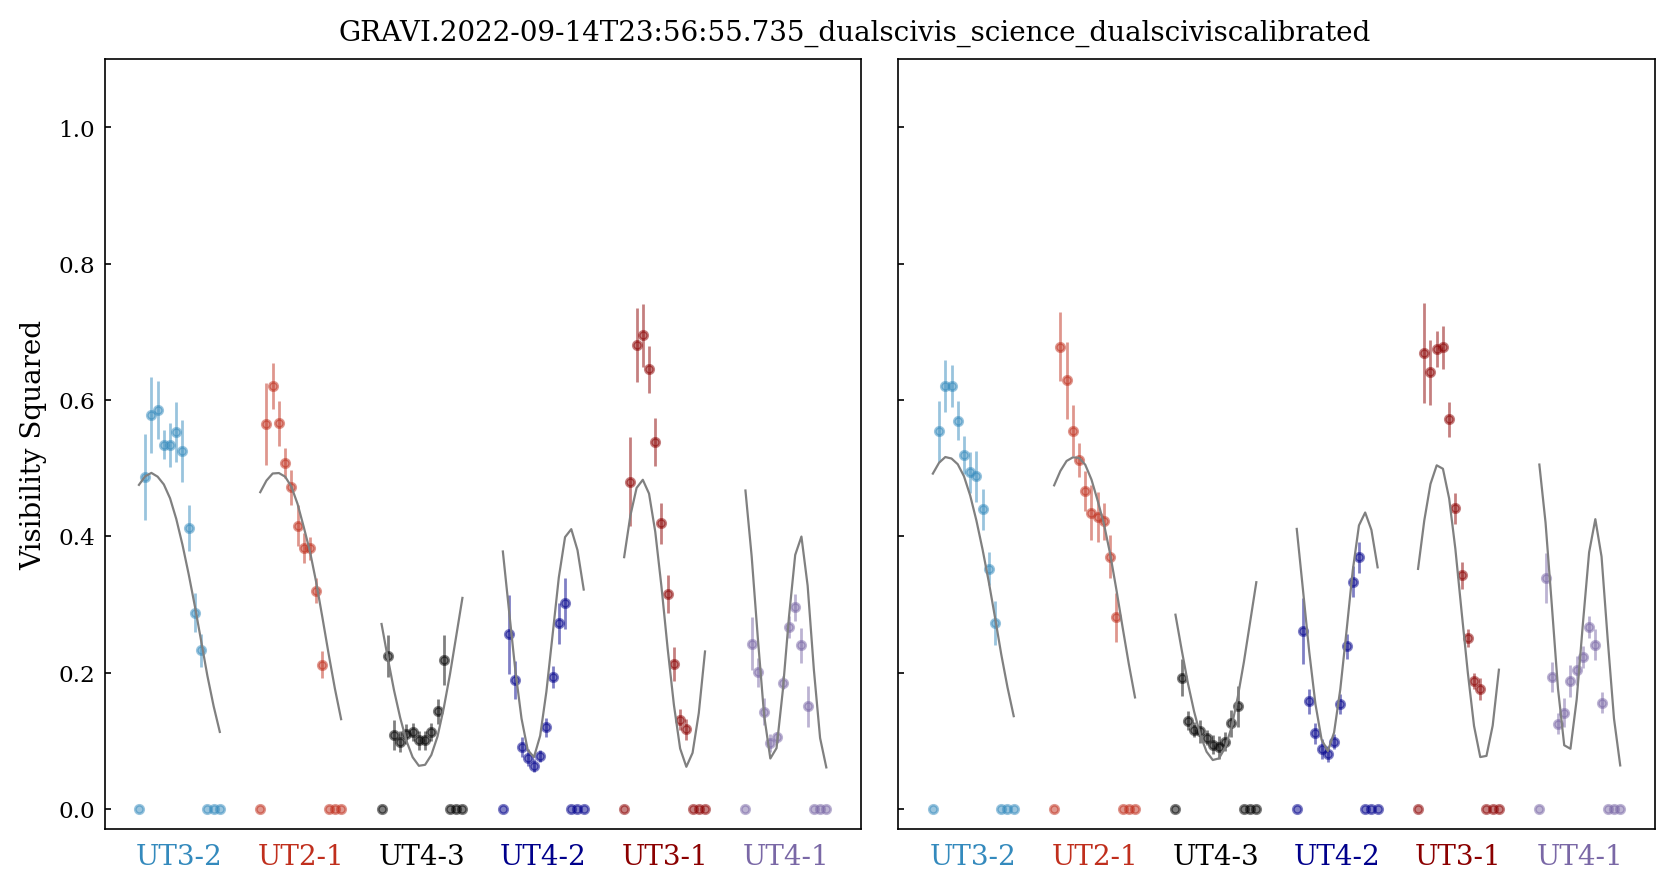

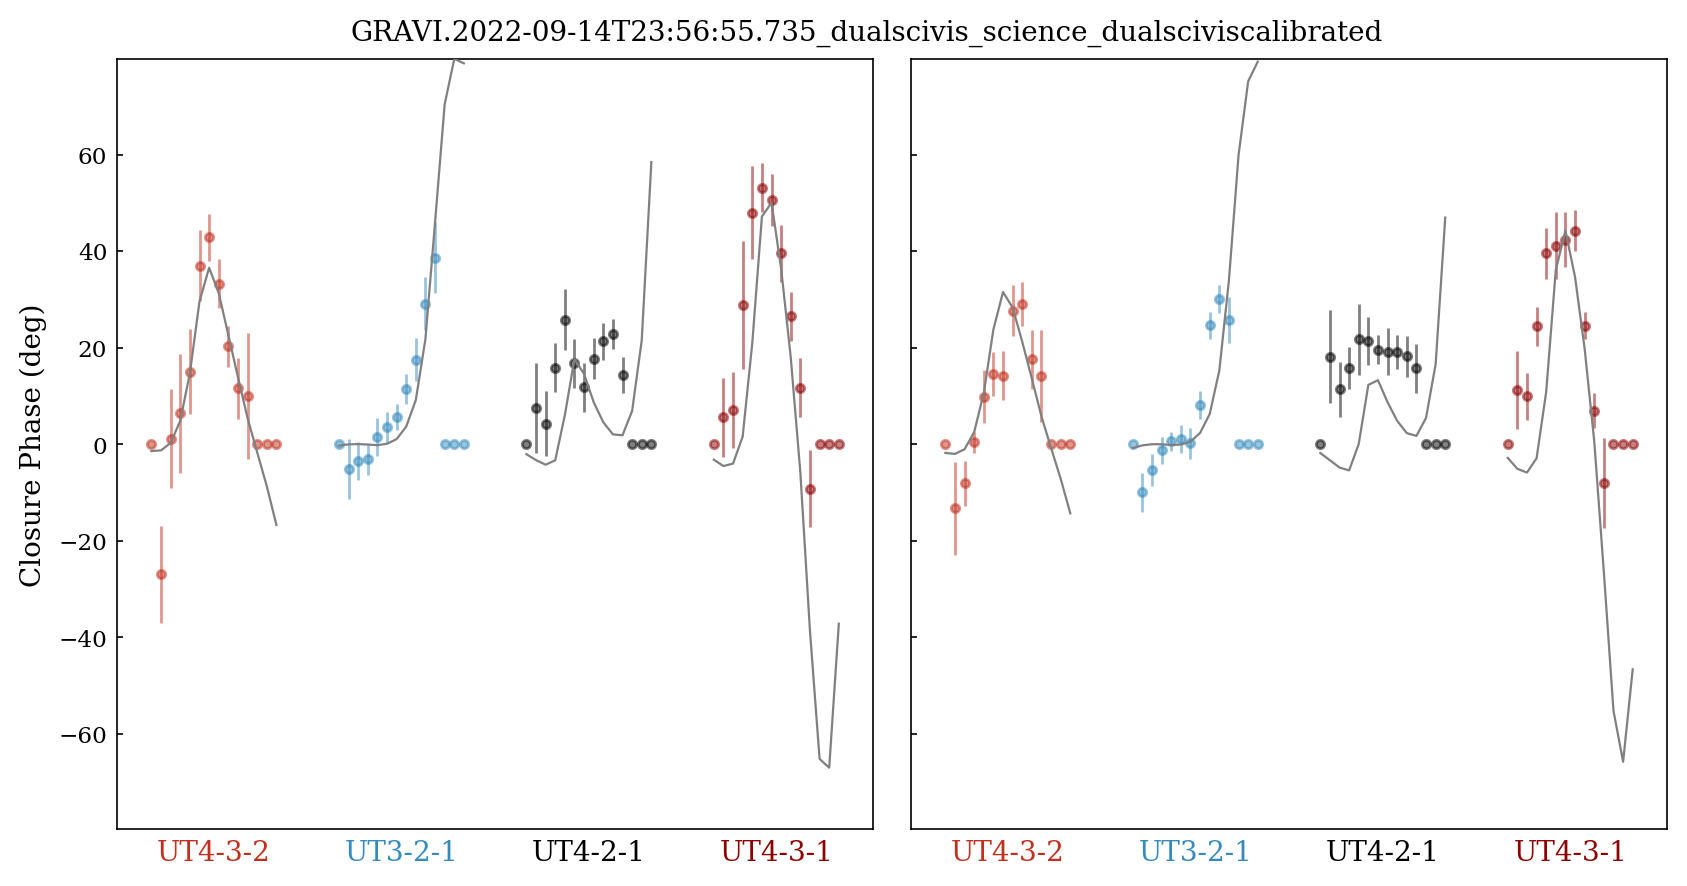

Combined red. chi2 of fitted data: 55.461


[array([24.71419385,  4.90583605, -2.91836893,  2.17400895,  0.82255726,
         0.12246803]),
 array([24.66031247,  4.7693686 , -2.9483211 ,  2.15351858,  0.76670058,
         0.13692545])]

In [16]:
fi = sgfiles[0]
f = gravipy.GravMFit(fi)
f.fitStars(
    # Mandatory arguments
    [s38[0], s62[0]],       # Ra guess, len = nsource, 
    [s38[1], s62[1]],       # Dec guess, len = nsource
    [s62s38],               # flux ratio guess, len = nsource-1
    # optional arguments
    fit_pos=[True, False],  # to not fit star positions
    fit_fr=[True],          # to not fit flux ratios
    fit_for=[0.5, 0.5, 1, 0. ], # what to fit for & weight [VisAmp, Vis2, closure, phases]
    nthreads=20,
    nwalkers=201,
    nruns=301,
    initial=[-4, 1,         # initial guesses: [alpha, fr BG, pc (x2), fr BH, coh. loss]
             0, 0, 
             0.5 , 1],
    plotScience=True,       # show data & fit
    #iopandas='Normalfit'
    )


In [17]:
f.fittab

,column,dRA1,dDEC1,dRA2,dDEC2,fr2,alpha BH,f BG,pc RA,pc Dec,fr BH,CL1,CL2,CL3,CL4,CL5,CL6,chi2
0,in P0_0,26.010993,3.076360,-7.716192,9.479202,-0.674797,-4.000000,1.000000,0.0,0.0,-0.301030,1.0,1.0,1.0,1.0,1.0,1.0,8.685209
1,M.L. P0_0,24.714194,4.905836,-7.716192,9.479202,-2.918369,2.174009,0.822557,0.0,0.0,0.122468,1.0,1.0,1.0,1.0,1.0,1.0,8.026809
2,M.P. P0_0,24.727565,4.881319,-7.716192,9.479202,-2.382240,1.801877,0.824033,0.0,0.0,0.119139,1.0,1.0,1.0,1.0,1.0,1.0,5.151428
3,$-\sigma$ P0_0,0.029131,0.100294,0.000000,0.000000,0.408896,2.088650,0.033889,0.0,0.0,0.029554,0.0,0.0,0.0,0.0,0.0,0.0,67.845535
4,$+\sigma$ P0_0,0.061809,0.051474,0.000000,0.000000,0.568405,0.564271,0.029254,0.0,0.0,0.012835,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5,in P1_0,26.010993,3.076360,-7.716192,9.479202,-0.674797,-4.000000,1.000000,0.0,0.0,-0.301030,1.0,1.0,1.0,1.0,1.0,1.0,11.163008
6,M.L. P1_0,24.660312,4.769369,-7.716192,9.479202,-2.948321,2.153519,0.766701,0.0,0.0,0.136925,1.0,1.0,1.0,1.0,1.0,1.0,13.290195
7,M.P. P1_0,24.720319,4.692981,-7.716192,9.479202,-2.559456,0.524918,0.771763,0.0,0.0,0.119071,1.0,1.0,1.0,1.0,1.0,1.0,9.144222
8,$-\sigma$ P1_0,0.056293,0.552397,0.000000,0.000000,0.275947,4.462350,0.416275,0.0,0.0,0.906938,0.0,0.0,0.0,0.0,0.0,0.0,81.624467
9,$+\sigma$ P1_0,0.269044,0.081132,0.000000,0.000000,0.611546,1.520757,0.032892,0.0,0.0,0.023957,0.0,0.0,0.0,0.0,0.0,0.0,NaN


# Fitting - not SgrA*

In [18]:
s42 = orb.pos_orbit('S42', t)*1e3
s29 = orb.pos_orbit('S29', t)*1e3
s42s29 = 10**(-0.4*(orb.star_orbits['S42']['Kmag'] - orb.star_orbits['S29']['Kmag']))

In [19]:
sep = s42-s29
pc = s29 - n_off

NDIT = 1
Run MCMC for DIT 1
using channels from #3 to #13
Run MCMC for Pol 1


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:35<00:00,  8.37it/s]


---------------------------------------
Mean acceptance fraction: 0.44
---------------------------------------


ndof: 53
red. chi2 for visamp: 3.90
red. chi2 for vis2: 3.91
red. chi2 for visphi: 3.73
red. chi2 for closure: 3.15


-----------------------------------
Best chi2 result:
dRA1 = -1.708
dDEC1 = -36.926
alpha BH = -0.773
f BG = 0.872
pc RA = 18.337
pc Dec = 34.072
fr BH = -0.466


MCMC Result:
dRA1 = -1.708 + 0.023 - 0.023
dDEC1 = -36.926 + 0.045 - 0.049
alpha BH = -0.174 + 1.872 - 0.792
f BG = 0.874 + 0.024 - 0.020
pc RA = 18.347 + 0.028 - 0.024
pc Dec = 34.067 + 0.044 - 0.045
fr BH = -0.457 + 0.024 - 0.015
-----------------------------------
Run MCMC for Pol 2


/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1725: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:36<00:00,  8.30it/s]
/afs/mpe.mpg.de/home/fwidmann/Python_Modules/gravipy/src/gravipy/gravmfit.py:1725: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fittab = fittab.append(_fittab, ignore_index=True)


---------------------------------------
Mean acceptance fraction: 0.41
---------------------------------------


ndof: 53
red. chi2 for visamp: 4.33
red. chi2 for vis2: 3.28
red. chi2 for visphi: 6.41
red. chi2 for closure: 3.22


-----------------------------------
Best chi2 result:
dRA1 = -1.577
dDEC1 = -36.946
alpha BH = -2.502
f BG = 0.694
pc RA = 18.339
pc Dec = 33.953
fr BH = -0.464


MCMC Result:
dRA1 = -1.605 + 0.031 - 0.039
dDEC1 = -36.840 + 0.102 - 0.084
alpha BH = -2.324 + 3.635 - 0.684
f BG = 0.710 + 0.026 - 0.020
pc RA = 18.361 + 0.032 - 0.028
pc Dec = 33.894 + 0.055 - 0.073
fr BH = -0.457 + 0.027 - 0.015
-----------------------------------


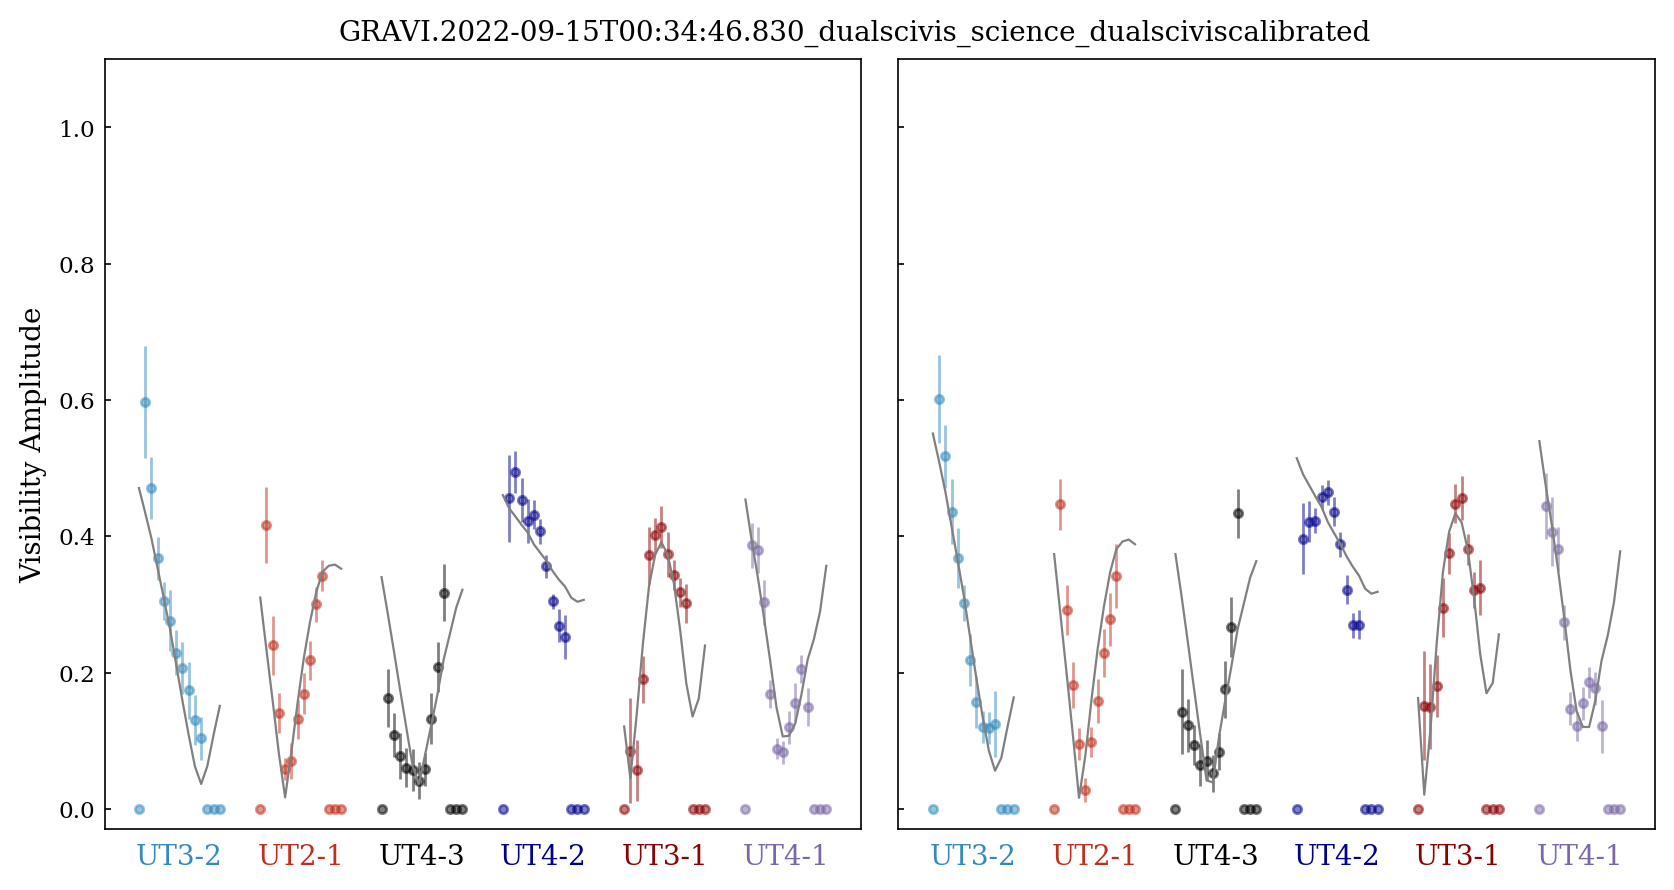

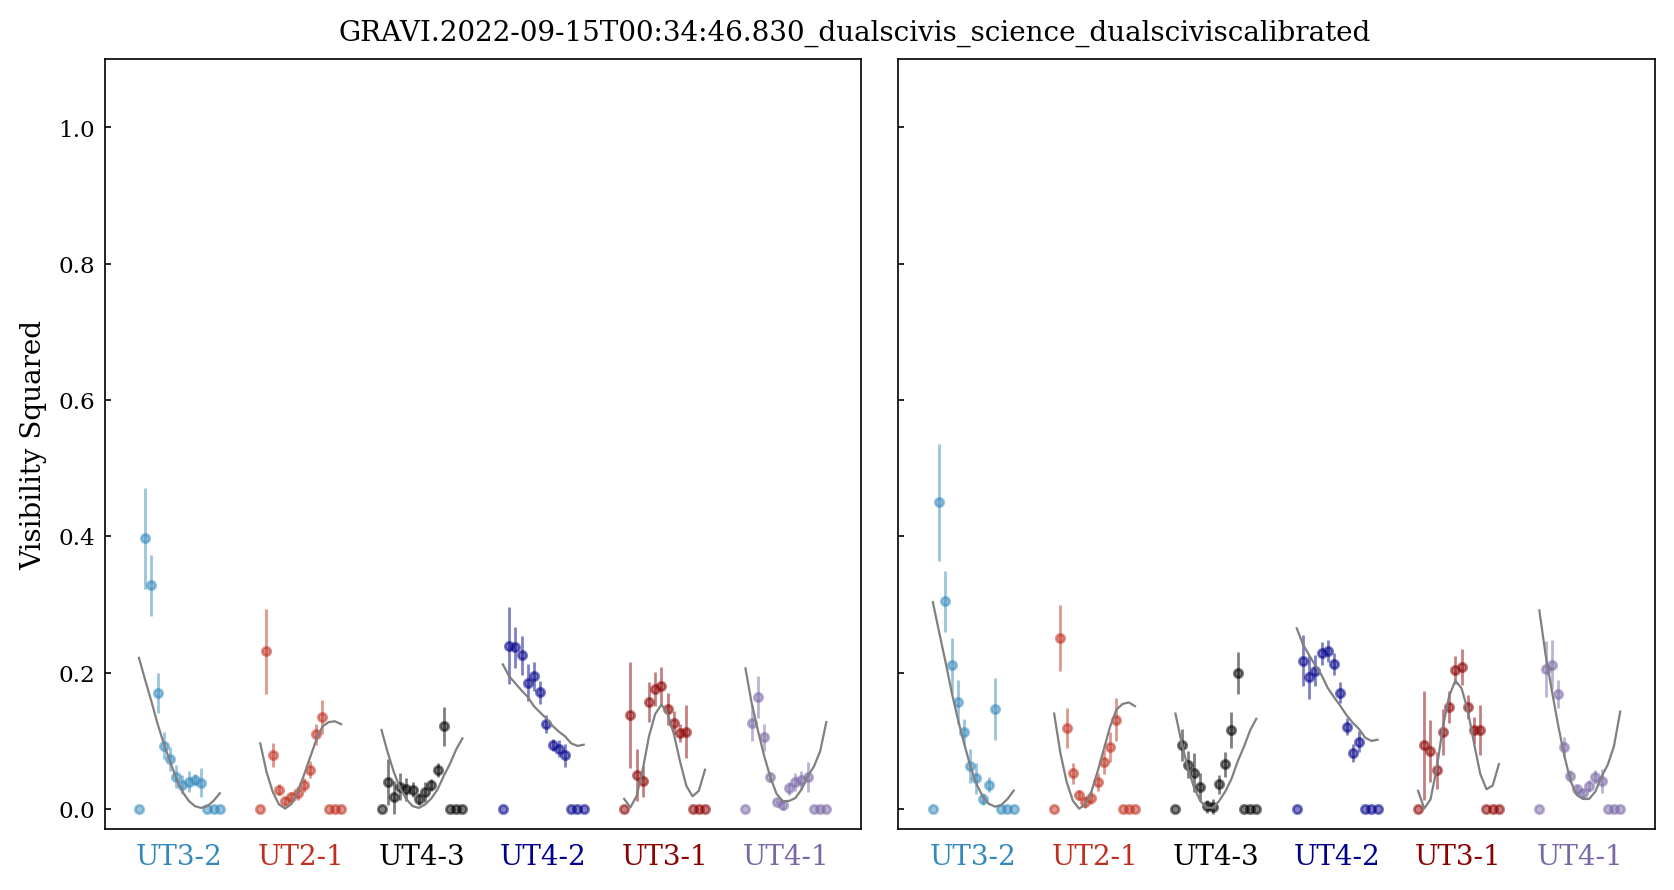

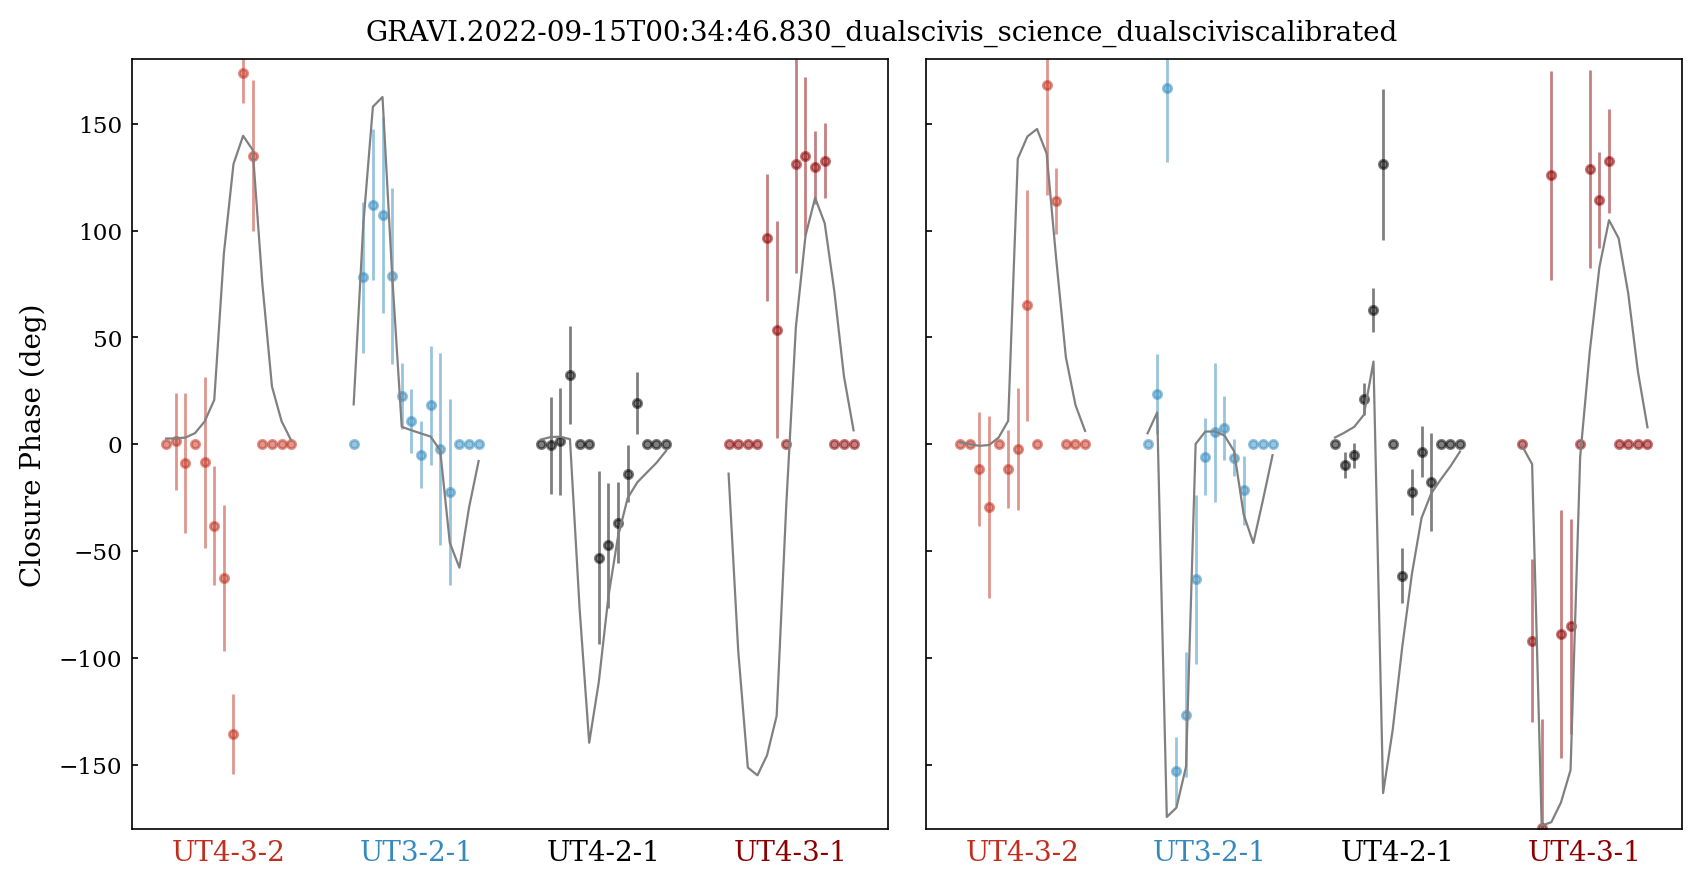

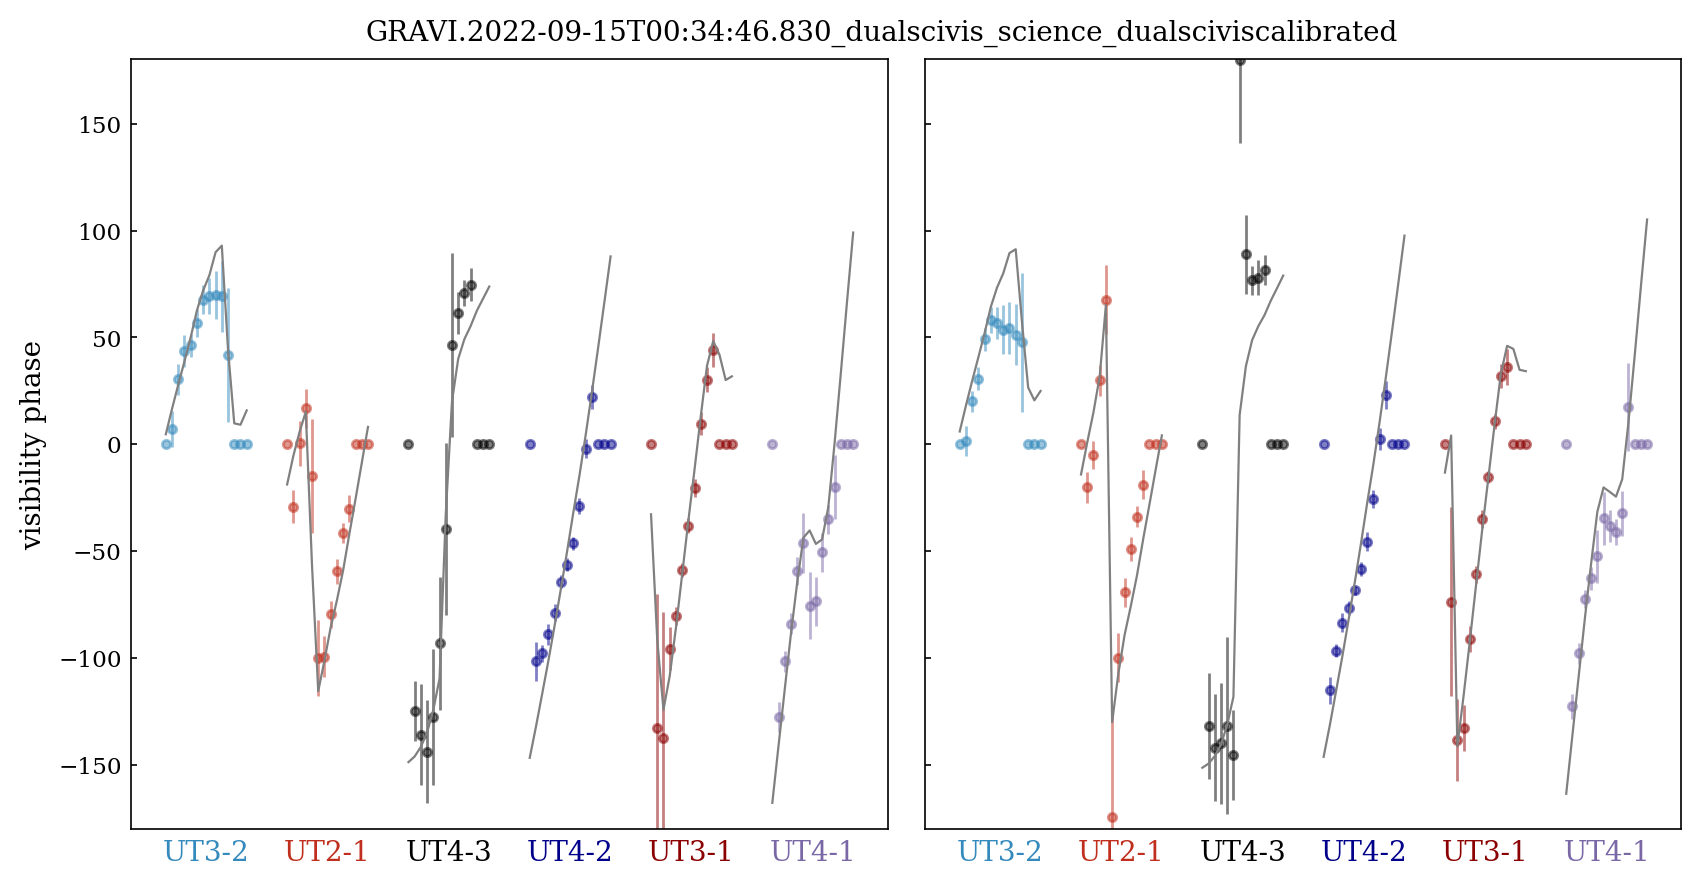

Combined red. chi2 of fitted data: 31.936


[array([ -1.70799987, -36.92643804,  -0.77311871,   0.87158236,
         18.33650294,  34.07247926,  -0.46601863]),
 array([ -1.57663535, -36.94589977,  -2.50221316,   0.69434659,
         18.33852418,  33.95253317,  -0.46361909])]

In [20]:
fi = northfiles[0]
f = gravipy.GravMFit(fi)
f.fitStars([sep[0]],
           [sep[1]],
           [],
           nthreads=20,
           nwalkers=201,
           nruns=301,
           fit_for=[1, 1, 1, 1. ],
           initial=[3, 3, *pc, s42s29, 1],
           plotScience=True)

NDIT = 1
using channels from #3 to #13
Pol 1


ndof: 53
red. chi2 for visamp: 36.96
red. chi2 for vis2: 17.39
red. chi2 for visphi: 99.71
red. chi2 for closure: 12.85


Pol 2


ndof: 53
red. chi2 for visamp: 43.65
red. chi2 for vis2: 24.26
red. chi2 for visphi: 133.72
red. chi2 for closure: 12.39




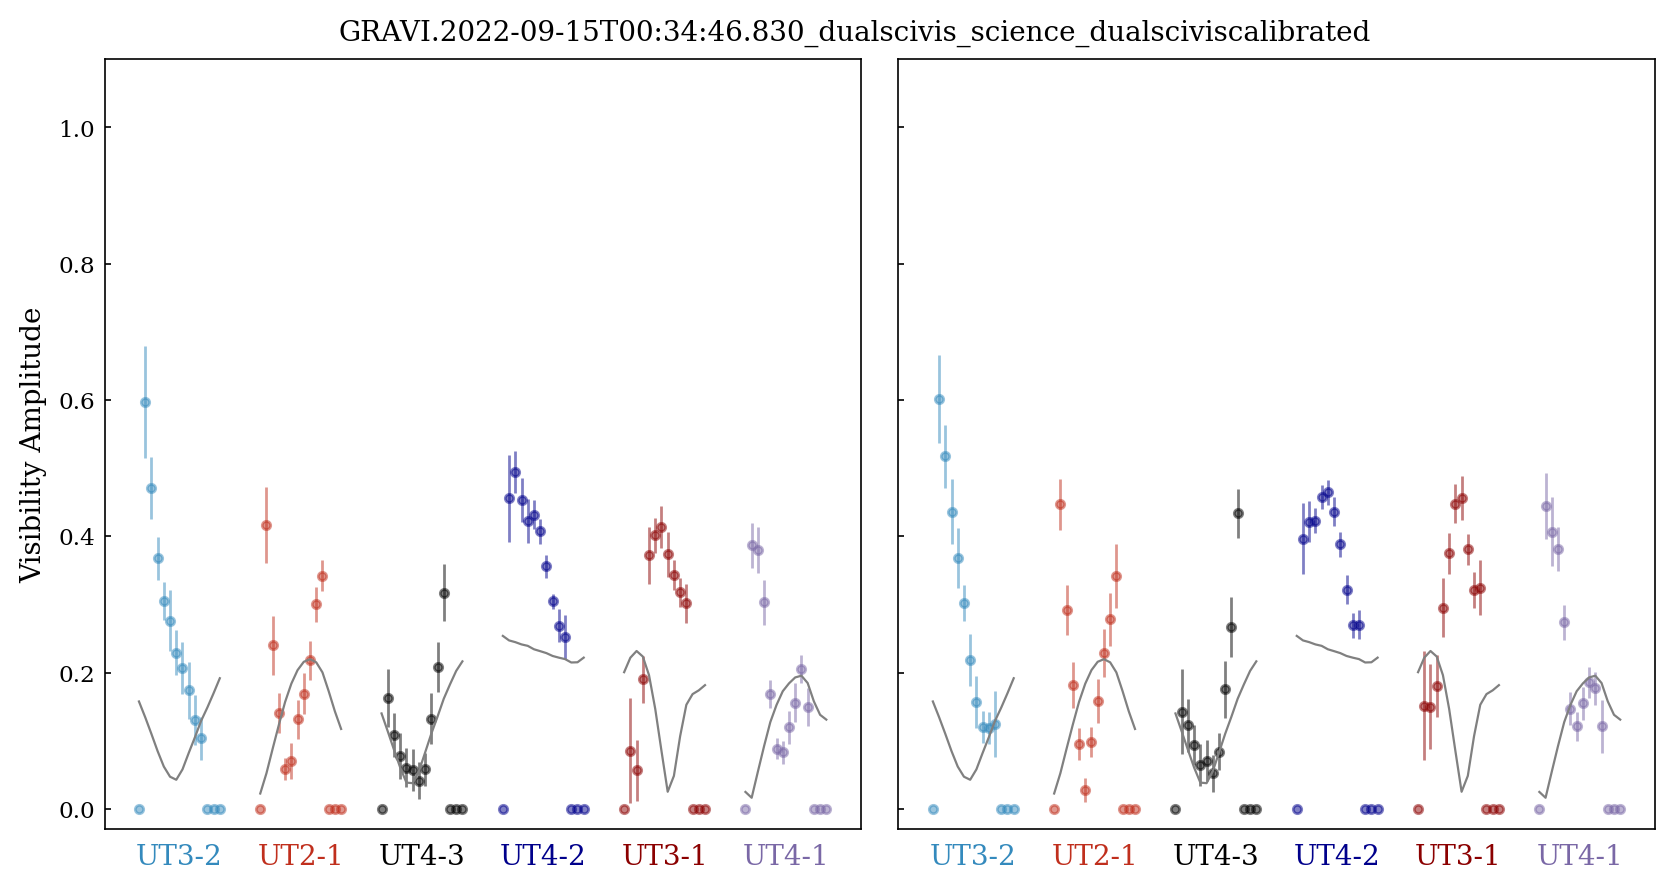

<Figure size 1400x900 with 0 Axes>

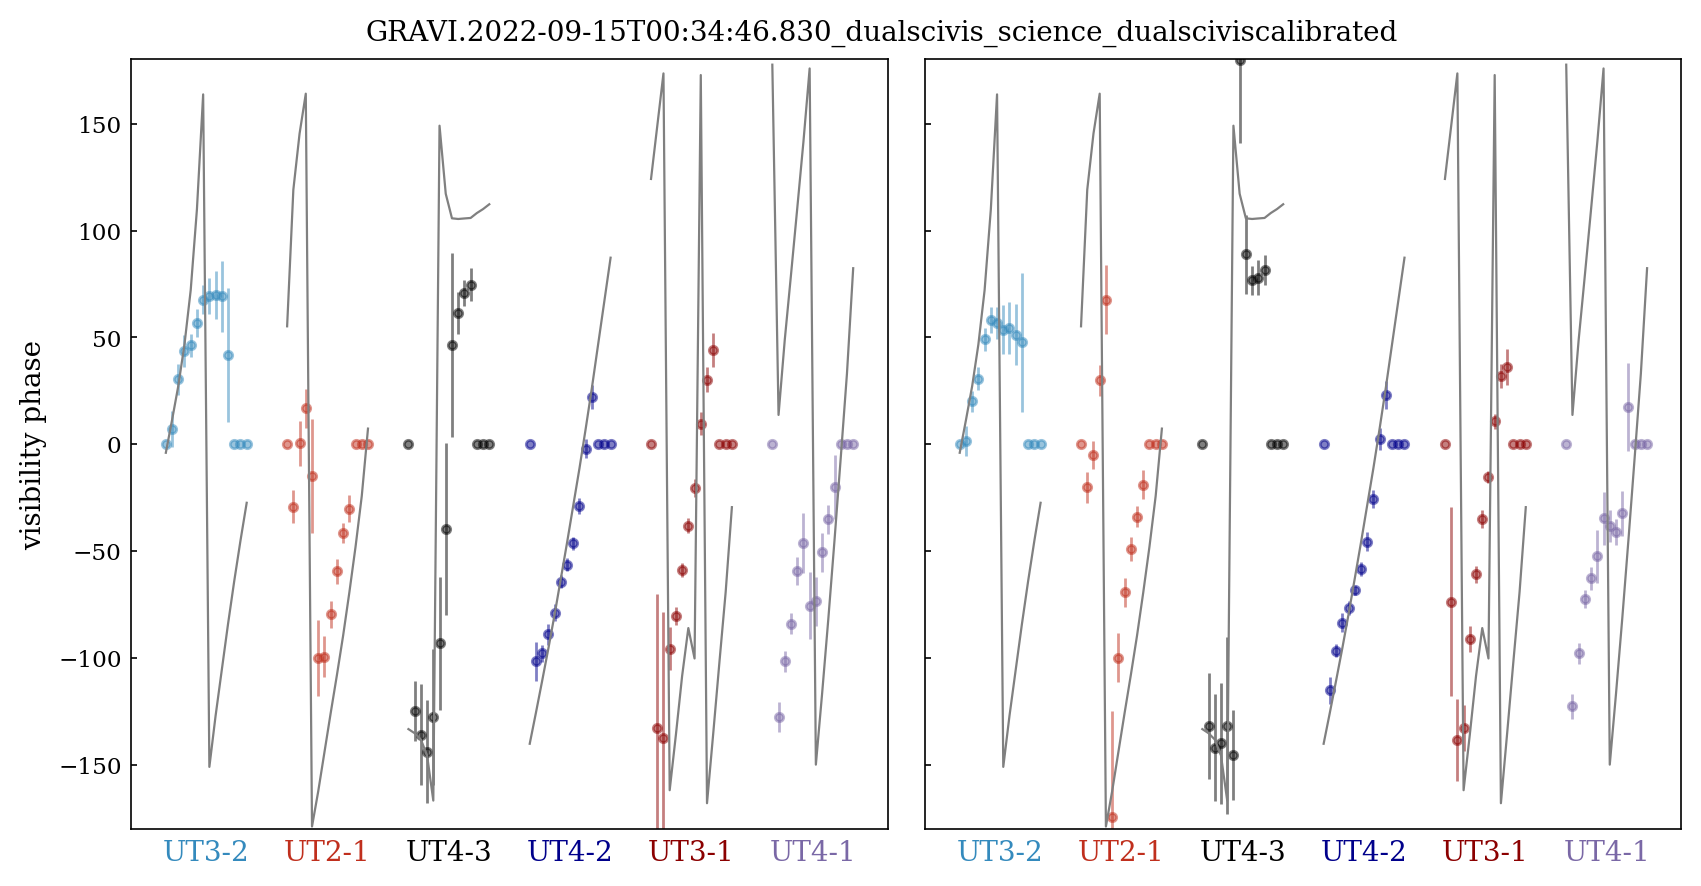

Combined red. chi2 of fitted data: 314.046


[]

In [21]:
f = gravipy.GravMFit(fi)
f.fitStars([sep[0]],
           [sep[1]],
           [],
           nthreads=20,
           nwalkers=201,
           nruns=301,
           fit_for=[1, 0, 0, 1. ],
           initial=[3, 3, 
                    *pc, 
                    s42s29, 1],
           plotScience=True,
           no_fit=True)

In [22]:
pwd

'/home/fwidmann/JupyterNotebooks/Gravipy_Tutorial'